## [KMNIST](https://pytorch.org/docs/stable/torchvision/datasets.html#kmnist)

In [1]:
import os
import random
import numpy as np
import torch
import torchvision

In [2]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed_everything(42)

In [3]:
dataset = torchvision.datasets.KMNIST('./data', download=True)

100%|██████████| 18165135/18165135 [00:02<00:00, 6957485.83it/s]


Extracting ./data/KMNIST/raw/train-images-idx3-ubyte.gz to ./data/KMNIST/raw



100%|██████████| 29497/29497 [00:00<00:00, 811918.87it/s]

Extracting ./data/KMNIST/raw/train-labels-idx1-ubyte.gz to ./data/KMNIST/raw




100%|██████████| 3041136/3041136 [00:00<00:00, 4349745.01it/s]


Extracting ./data/KMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/KMNIST/raw



100%|██████████| 5120/5120 [00:00<00:00, 16393004.95it/s]

Extracting ./data/KMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/KMNIST/raw



In [4]:
print(type(dataset))

# tuple: (image, target)

<class 'torchvision.datasets.mnist.KMNIST'>


In [5]:
print(len(dataset))

60000


In [6]:
n = 200
data, target = dataset[n]

In [7]:
print(type(data))

<class 'PIL.Image.Image'>


In [8]:
print(data.mode, data.width, data.height)

L 28 28


In [9]:
print(type(target))

<class 'int'>


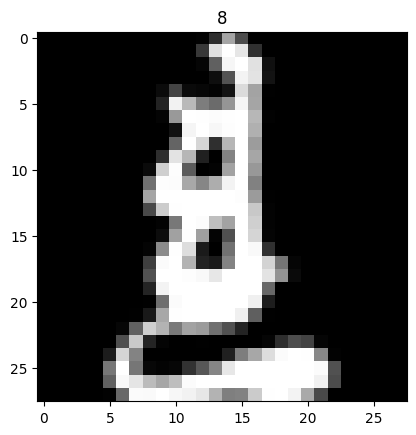

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title(target)
plt.imshow(data, cmap='gray')
data.show()

In [11]:
import torchvision.transforms as transforms
# batch must contain tensors, numpy arrays, numbers, dicts or lists
ToTensor = transforms.Compose([
    transforms.ToTensor()
])
dataset = torchvision.datasets.KMNIST('./data', transform = ToTensor)

In [12]:
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=1,
                                          shuffle=True)

torch.Size([1, 1, 28, 28])
torch.Size([28, 28])


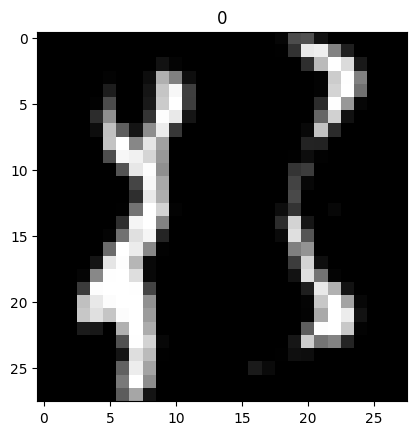

In [13]:
ToPILImage = transforms.Compose([
    transforms.ToPILImage()
])

for data, target in data_loader:
    print(data.shape)
    data = data.squeeze() # 불필요한 차원 하나를 줄인다(batch_size=1)
    data = data.squeeze() # 불필요한 차원 하나를 줄인다(color)
    print(data.shape)
    pic = ToPILImage(data)
    plt.title(int(target))
    plt.imshow(pic, cmap='gray')
    plt.show()
    break

In [14]:
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=10,
                                          shuffle=True)

torch.Size([10, 1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])


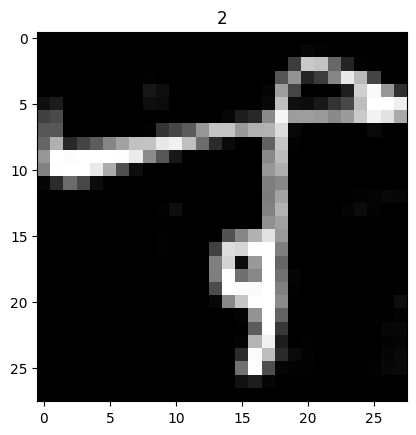

In [15]:
ToPILImage = transforms.Compose([
    transforms.ToPILImage()
])

for data, target in data_loader:
    index = 5
    print(data.shape)
    img = data[index]
    print(img.shape)
    img = img[0] 
    print(img.shape)
    pic = ToPILImage(img)
    plt.title(int(target[index]))
    plt.imshow(img, cmap='gray')
    plt.show()
    break

In [16]:
# 1000개 batch
n = 1000
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=n,
                                          shuffle=True)
i = 0
l = []
for data, target in data_loader:
    i += len(data)
    l.append(len(data))
    
print(l)
print('Total number of data: {}'.format(i))

# 2000개 batch
n = 2000
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=n,
                                          shuffle=True)
i = 0
l = []
for data, target in data_loader:
    i += len(data)
    l.append(len(data))
    
print(l)
print('Total number of data: {}'.format(i))

# 999개 batch
n = 999
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=n,
                                          shuffle=True)
i = 0
l = []
for data, target in data_loader:
    i += len(data)
    l.append(len(data))

print(l)
print('Total number of data: {}'.format(i))

[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
Total number of data: 60000
[2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000]
Total number of data: 60000
[999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 60]
Total number of data: 60000


In [17]:
%matplotlib inline

import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.utils as utils
import torchvision.transforms as transforms

is_cuda = torch.cuda.is_available()
device = torch.device('cuda' if is_cuda else 'cpu')

In [18]:
import torchvision.transforms as transforms
compose = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5), std=(0.5))
])

train_data = torchvision.datasets.KMNIST(root='./data/', train=True, transform=compose, download=True)
test_data  = torchvision.datasets.KMNIST(root='./data/', train=False, transform=compose, download=True)

In [19]:
print('train sets: {}'.format(len(train_data)))
print('test sets: {}'.format(len(test_data)))

train sets: 60000
test sets: 10000


In [20]:
BATCH_SIZE = 10

train_loader = torch.utils.data.DataLoader(train_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)

In [21]:
class KMNISTModel(nn.Module):
    def __init__(self, output_size):
        super(KMNISTModel, self).__init__()

        self.c1 = nn.Conv2d(1, 8, kernel_size=3) # (n, 1, 28, 28) -> (n, 8, 26, 26)
        # MaxPool2d(2) # (n, 8, 26, 26) -> (n, 8, 13, 13)
        self.c2 = nn.Conv2d(8, 16, kernel_size=3) # (n, 8, 13, 13) -> (n, 16, 11, 11)
        self.c3 = nn.Conv2d(16, 32, kernel_size=3) # (n, 16, 11, 11) -> (n, 32, 9, 9)
        self.c4 = nn.Conv2d(32, 32, kernel_size=1) # (n, 32, 9, 9) -> (n, 32, 9, 9)

        nn.init.kaiming_normal_(self.c1.weight)
        nn.init.kaiming_normal_(self.c2.weight)
        nn.init.kaiming_normal_(self.c3.weight)
        nn.init.kaiming_normal_(self.c4.weight)
        
        self.cv = nn.Sequential(
                self.c1,
                nn.BatchNorm2d(8),
                nn.ReLU(),
                nn.MaxPool2d(2),
                self.c2,
                nn.BatchNorm2d(16),
                nn.ReLU(),
                self.c3,
                nn.BatchNorm2d(32),
                nn.ReLU(),
                self.c4,
                nn.BatchNorm2d(32),
                nn.ReLU(),
                nn.Dropout(0.2)
        )

        self.l1 = nn.Linear(32*9*9, output_size)
        nn.init.kaiming_normal_(self.l1.weight)

        self.fc = nn.Sequential(self.l1, 
                        nn.BatchNorm1d(output_size))        

    def forward(self, x):
        x = self.cv(x)
        x = x.view(-1, 32*9*9)
        output = self.fc(x)
        value = torch.max(output, 1)[1]
        return output, value

In [22]:
model = KMNISTModel(10).to(device)

In [23]:
n = 0
for data, target in train_loader:
    print(data.shape) # (batch, channel, width, height)
    break

data = data.to(device)

with torch.no_grad():
    y, _ = model(data)
    print(y)
    print(np.argmax(y.cpu(), axis=1), target)

torch.Size([10, 1, 28, 28])
tensor([[ 1.0908e+00, -2.2904e-01, -1.7137e+00, -5.7939e-02,  1.4512e-01,
          1.7079e-01,  6.2624e-01,  1.1868e+00, -1.3236e+00,  5.2280e-01],
        [ 1.8171e-01, -1.1016e+00,  3.5697e-01,  4.8663e-01, -9.5915e-01,
         -2.0654e+00,  3.7226e-01,  8.5459e-01, -8.1590e-01,  1.1749e+00],
        [ 9.3571e-01,  1.7886e+00, -1.8582e+00, -1.5513e+00,  2.0076e+00,
         -3.8023e-01,  2.5614e-01, -1.9996e+00,  4.6264e-01, -1.5102e-01],
        [-1.4251e+00,  8.8277e-02,  1.2008e-01,  1.5868e+00, -9.3728e-01,
          5.8873e-01, -8.0577e-01,  1.5581e-01,  4.8161e-01, -3.3150e-01],
        [ 1.4841e+00, -1.1064e+00,  8.7821e-01, -4.5013e-01,  1.6622e+00,
         -8.1539e-01, -2.1911e-01,  7.4888e-01,  1.5377e+00, -1.3069e+00],
        [-2.4367e-01,  3.9643e-01,  7.2927e-02, -1.4087e+00, -5.8279e-01,
         -6.7990e-01, -8.1737e-01, -6.8247e-01,  3.4061e-01,  1.1957e+00],
        [-4.1636e-01, -9.0972e-01,  1.1189e+00,  4.7680e-01, -2.1344e-01,
    

In [24]:
BATCH_SIZE = 1000

train_loader = torch.utils.data.DataLoader(train_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)

In [25]:
def train(model, optimizer, criterion, last_epoch, n_epochs, train_loader, test_loader):
    list_training_loss = []
    list_test_loss = []

    for epoch in range(n_epochs):
        n_train = 0
        train_loss = 0
        model.train()
        for train_data, train_target in train_loader:
            train_data = train_data.to(device)
            train_target = train_target.to(device)
            y, _ = model(train_data)
            loss = criterion(y, train_target).sum()
            train_loss += loss.data.cpu().numpy()
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            n_train += 1
            del train_data
            del train_target

        model.eval()
        n_test = 0
        test_loss = 0
        correct = 0
        total = 0
        for test_data, test_target in test_loader:
            test_data = test_data.to(device)
            test_target = test_target.to(device)
            y_pred, idx_pred = model(test_data)
            del test_data
            loss = criterion(y_pred, test_target).sum()
            test_loss += loss.data.cpu().numpy()
            n_test += 1
            total += len(test_target)
            correct += (idx_pred == test_target).sum()

        accuracy = correct * 100 / total
        print('epoch {}th training loss: {} test loss: {}, accuracy: {}'.format(
                epoch + last_epoch, train_loss / n_train, test_loss / n_test,
                accuracy
            ))
        list_training_loss.append(train_loss / n_train)
        list_test_loss.append(test_loss / n_test)

    return list_training_loss, list_test_loss

In [26]:
model = KMNISTModel(10).to(device) 
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss().to(device)

n_epochs = 3 # 3회 학습

list_training_loss, list_test_loss = train(model, optimizer, criterion, 0, n_epochs, train_loader, train_loader)

epoch 0th training loss: 0.6687548756599426 test loss: 0.37554341554641724, accuracy: 94.13500213623047
epoch 1th training loss: 0.27057650685310364 test loss: 0.20466183125972748, accuracy: 97.0633316040039
epoch 2th training loss: 0.1667313575744629 test loss: 0.1348884552717209, accuracy: 97.90499877929688


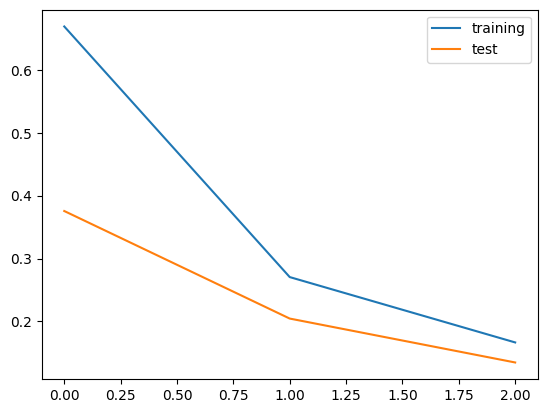

In [27]:
import matplotlib.pyplot as plt

plt.plot(list_training_loss, label='training')
plt.plot(list_test_loss, label='test')
plt.legend()
plt.show()

In [28]:
from sklearn.metrics import accuracy_score
import numpy as np

def evaluate(model, test_loader):
    model.eval()
    y_test = None
    y_pred = None
    for test_data, test_target in test_loader:
        test_data = test_data.to(device)
        test_target = test_target.to(device)
        _, y = model(test_data)
        del test_data
        if None == y_test:
            y_test = test_target
        else:
            torch.cat([y_test, test_target], dim=0)
        if None == y_pred:
            y_pred = y
        else:
            torch.cat([y_pred, y], dim=0)

    score = accuracy_score(y_test.cpu(), y_pred.cpu())
    return score

print(evaluate(model, test_loader))

0.92


In [29]:
torch.save(model, '3rd.pth')

In [30]:
model_new = torch.load('3rd.pth')

/tmp/ipykernel_120708/2358517299.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_new = torch.load('3rd.pth')


In [31]:
print(evaluate(model_new, test_loader))

0.92


In [32]:
torch.save({
            'epoch': n_epochs,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'train_loss': list_training_loss[-1],
            'test_loss': list_test_loss[-1]
        },
        '3rd.tar')

In [33]:
model_new = KMNISTModel(10).to(device) 
optimizer_new = torch.optim.Adam(model_new.parameters(), lr=0.01)
criterion_new = nn.CrossEntropyLoss().to(device)

n_epochs = 3 # 3회 학습

checkpoint = torch.load('3rd.tar')

/tmp/ipykernel_120708/938843905.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load('3rd.tar')


In [34]:
print(checkpoint)

{'epoch': 3, 'model_state_dict': OrderedDict([('c1.weight', tensor([[[[-0.2611, -0.0741,  0.4933],
          [-0.6109, -0.2607, -0.0938],
          [ 0.4828, -0.3090,  0.3776]]],


        [[[-0.4363,  0.0161,  0.7547],
          [-0.6478,  0.6224, -0.0261],
          [ 0.6168, -0.5025,  0.1845]]],


        [[[ 0.1428,  0.2786,  0.3186],
          [-0.2242, -0.0423, -0.0646],
          [ 0.0824, -0.4627, -0.3808]]],


        [[[ 0.2805,  0.3571, -0.5469],
          [ 0.9776, -0.9262, -0.8478],
          [ 0.2390,  0.6534, -0.0198]]],


        [[[-0.1929, -0.3456,  0.1298],
          [-0.8287, -0.3892, -1.2921],
          [-0.4753, -0.6026, -0.1555]]],


        [[[ 0.2682,  0.3963, -0.3231],
          [-0.0322, -0.9305, -0.4136],
          [-0.4165,  0.1688,  0.2440]]],


        [[[ 0.0644,  0.8922, -0.3264],
          [ 0.1780, -0.2070,  0.3161],
          [ 0.3704,  0.7048,  0.5080]]],


        [[[-0.2490, -0.3147, -0.1955],
          [ 0.2004, -0.5935, -0.1180],
          [ 0.3

In [35]:
model_new.load_state_dict(checkpoint['model_state_dict'])
optimizer_new.load_state_dict(checkpoint['optimizer_state_dict'])
last_epoch = checkpoint['epoch']

list_training_loss, list_test_loss = train(model_new, optimizer_new, criterion_new, last_epoch, n_epochs, train_loader, train_loader)

epoch 3th training loss: 0.12128736078739166 test loss: 0.08734986186027527, accuracy: 98.49166870117188
epoch 4th training loss: 0.09534081816673279 test loss: 0.0683804377913475, accuracy: 98.9749984741211
epoch 5th training loss: 0.07931473851203918 test loss: 0.07253741472959518, accuracy: 98.8133316040039


In [36]:
print(evaluate(model_new, test_loader))

0.934
